<a href="https://colab.research.google.com/github/gloriaconcepto/NLP-PROJECTS-LEARNING/blob/main/Spam_Message.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_file = '/content/drive/MyDrive/NLP/NLP-8-PROJECTS/SpamMessageClassification/spam.tsv'

In [4]:
df = pd.read_csv(data_file, sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


# **** check for missing column and cleaning up processes

In [6]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


 checking in the dataset if it is baise

In [8]:
# the dataset is baise but we will still work on it for learning purposes
df['label'].value_counts()
#results show it is really baise
# IT WORTH KNOWING THAT WE HAVE TWO BASICS WAYS OF HANDLING UNBALANCE DATA
# 1) Undersample the Majority Class
# 2) Oversample the Minority Class
# But we gonna use undersample approached

label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df['label'].value_counts()/ (len(df))
# percentage biase rate

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [10]:
# Separate the spam and ham classes
spam = df[df['label'] == 'spam']
ham = df[df['label'] == 'ham']

In [11]:
spam.shape , ham.shape

((747, 4), (4825, 4))

In [12]:
 # Undersample the majority class (ham in this example)
ham = ham.sample(spam.shape[0])

In [13]:
# recheck the shape again to see if it baise or not
spam.shape , ham.shape

((747, 4), (747, 4))

In [14]:
# create a new data with spam append to ham and retain the very same index
data = pd.concat([spam,ham],ignore_index=True)

In [15]:
data.shape

(1494, 4)

In [16]:
data['label'].value_counts()

label
spam    747
ham     747
Name: count, dtype: int64

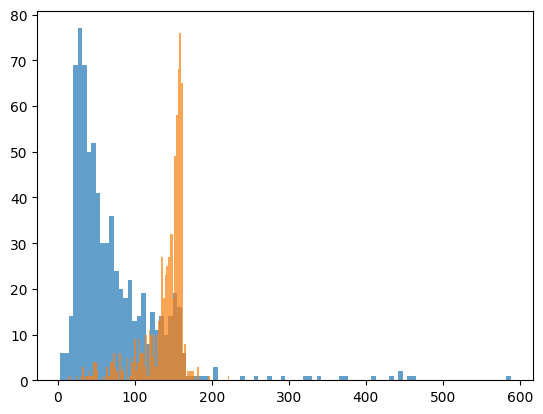

In [17]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

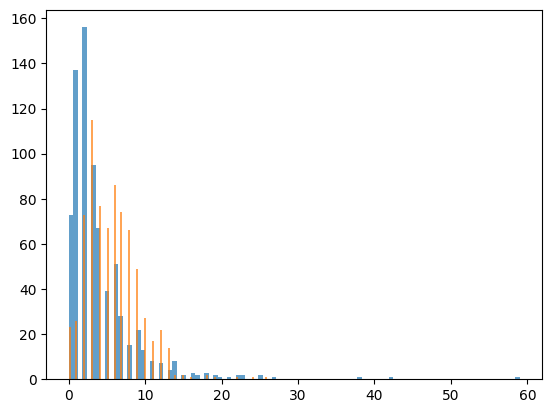

In [18]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

# Split the data into training and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

In [21]:
X_train.shape , X_test.shape

((1045,), (449,))

# 4) Building the Model (Random Forest)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline


In [23]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [24]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# Predicting the results

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
y_test, y_pred

(799      ham
 1047     ham
 1436     ham
 54      spam
 793      ham
         ... 
 824      ham
 822      ham
 644     spam
 1034     ham
 1356     ham
 Name: label, Length: 449, dtype: object,
 array(['ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam',
        'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
        'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham',
        'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam',
        'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam',
        'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ha

In [27]:
# accuracy sample test of the alogarithm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [28]:
accuracy_score(y_test, y_pred)

0.9576837416481069

In [29]:
# confustion matrix
confusion_matrix(y_test, y_pred)

array([[220,   2],
       [ 17, 210]])

In [30]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       222
        spam       0.99      0.93      0.96       227

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# Sample Testing

In [31]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [32]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [33]:
import joblib
import os

In [34]:
# Define the path where you want to save the model
model_path = '/content/drive/MyDrive/NLP/NLP-8-PROJECTS/SpamMessageClassification/modet-spam.pkl'

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)


In [35]:
# Save the model
joblib.dump(classifier, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/NLP/NLP-8-PROJECTS/SpamMessageClassification/modet-spam.pkl
